In [19]:
import numpy as np;
import matplotlib.pyplot as plt;  
plt.style.use('seaborn');  

/var/folders/x7/9ty2h5cs0716vwyxytpxwh_m0000gn/T/ipykernel_18066/1661795099.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


In [20]:
# Data Geenerate X,Y
def generate_data(m):
    # give 100 random number from normal distribution with mean 0 and standard deviation 1
    # range of X is -1 to 1
    # *10 is to increase the range of X from -10 to 10 and mean is still 0 standard deviation is 10
    X=np.random.randn(m)*10;
    noise=np.random.randn(m)*3;
    Y=3*X+1+noise;
    return X,Y;

In [21]:
X,Y=generate_data(100);
print(X.shape,Y.shape);

(100,) (100,)


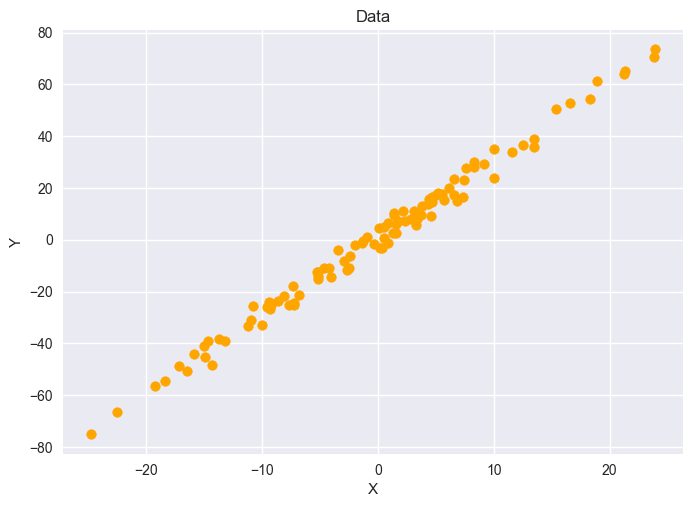

In [22]:
#Plot the data
def plotData(X,Y,color='orange',title="Data"):
    plt.title(title);
    plt.xlabel("X");
    plt.ylabel("Y");
    plt.scatter(X,Y,c=color);
    plt.show();

plotData(X,Y);

In [23]:
# Spread of the data is very high so we need to normalize the data in X 
def normalizeData(X):
    X=(X-X.mean())/X.std();
    return X;

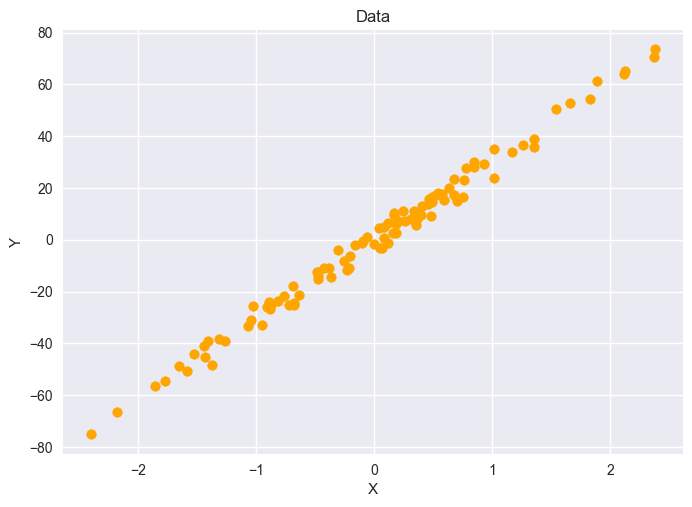

1.1102230246251566e-18 0.9999999999999998


In [24]:
X=normalizeData(X);
plotData(X,Y);
print(X.mean(),X.std());

In [25]:
# Train Test Split the data 
def trainTestSplit(X,Y,split=0.8):
    m=X.shape[0];
    data=np.zeros((m,2));
    data[:,0]=X;
    data[:,1]=Y;
    
    np.random.shuffle(data);
    
    split=int(split*m);
    X_train=data[:split,0];  # 0 to 79 rows and column is 0
    Y_train=data[:split,1];  # 0 to 79 rows and column is 1

    X_test=data[split:,0];   # 80 to 99 rows and column is 0
    Y_test=data[split:,1];   # 80 to 99 rows and column is 1

    return X_train,Y_train,X_test,Y_test;

In [26]:
X_train,Y_train,X_test,Y_test=trainTestSplit(X,Y);
print(X_train.shape,Y_train.shape);
print(X_test.shape,Y_test.shape);

(80,) (80,)
(20,) (20,)


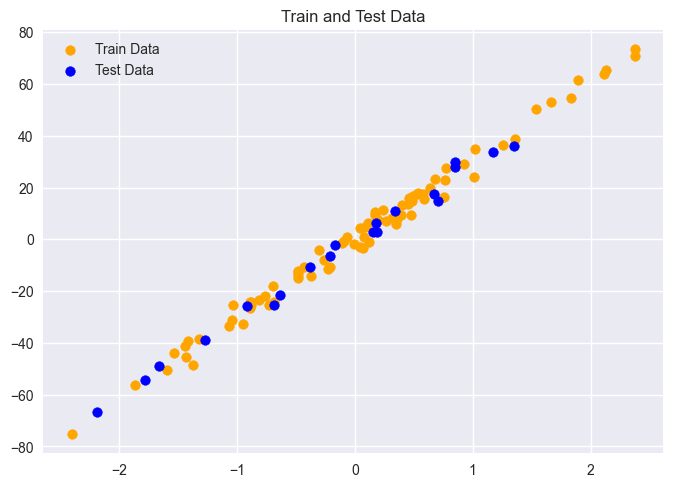

In [27]:
plt.title("Train and Test Data");
plt.scatter(X_train,Y_train,c='orange',label="Train Data");
plt.scatter(X_test,Y_test,c='blue',label="Test Data");
plt.legend();
plt.show();

In [39]:
# Hypothesis Function
# h(x)=theta0+theta1*x
def hypothesis(X,theta):
    return theta[0]+theta[1]*X;

# Error Function
# J(theta0,theta1)=(1/2m)*sum(h(x)-y)^2

def error(X,Y,theta):
    m=X.shape[0];
    total_error=0;
    for i in range(m):
        y_=hypothesis(X[i],theta);
        # actual value is Y[i] and predicted value is y_
        total_error+=(y_-Y[i])**2;
    
    return total_error/(2*m);


# Gradient Function
def gradient(X,Y,theta):
    m=X.shape[0];
    grad=np.zeros((2,));

    for i in range(m):
        y_=hypothesis(X[i],theta);
        grad[0]+=(y_-Y[i]);
        grad[1]+=(y_-Y[i])*X[i];

    return grad/m;

# training function
# loop until convergence
def train(X,Y,learning_rate=0.1,max_itr=100):
    theta=np.zeros((2,));

    error_list=[];

    for i in range(max_itr):
        grad=gradient(X,Y,theta);
        error_list.append(error(X,Y,theta));
        theta[0]=theta[0]-learning_rate*grad[0];
        theta[1]=theta[1]-learning_rate*grad[1];

    plt.xlabel("Iterations");
    plt.ylabel("Loss");
    plt.plot(error_list);
    return theta;

[-0.04525341 30.30363448]


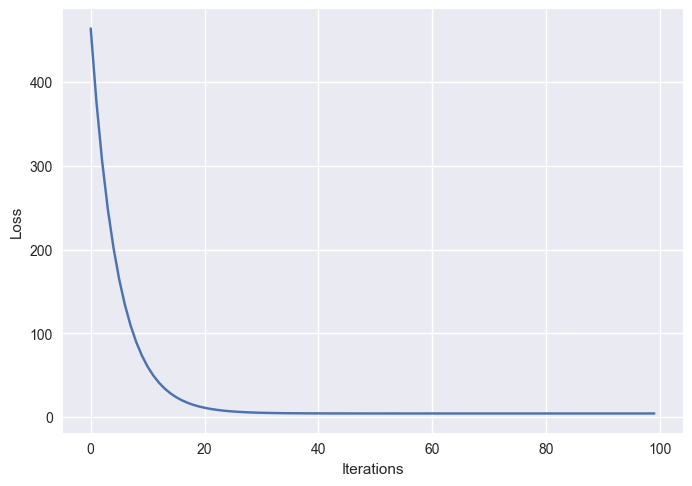

In [40]:
theta=train(X,Y);

In [41]:
theta

array([-0.04525341, 30.30363448])

In [45]:
def predict(X,theta):
    return hypothesis(X,theta);

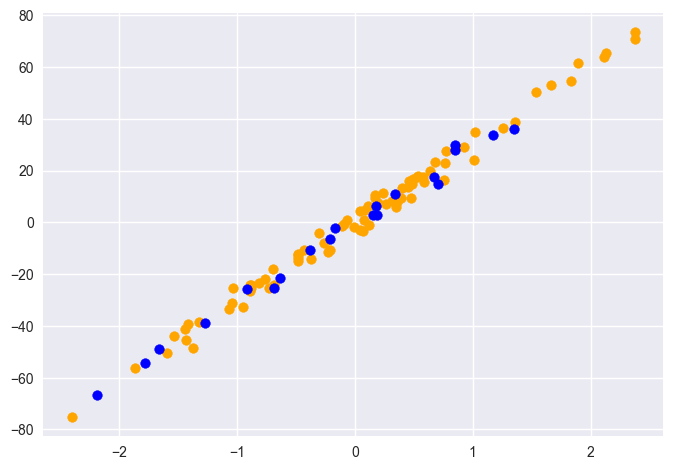

In [43]:
plt.scatter(X_train,Y_train,color="orange");
plt.scatter(X_test,Y_test,color="blue");
plt.show();

In [46]:
yp=predict(X_test,theta);

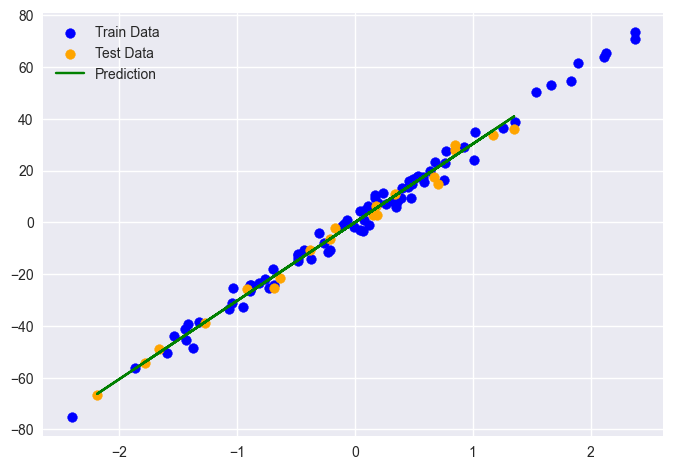

In [53]:
plt.scatter(X_train,Y_train,color="blue",label="Train Data");
plt.scatter(X_test,Y_test,color="orange",label="Test Data");
plt.plot(X_test,yp,color="green",label="Prediction");
plt.legend();
plt.show();

In [63]:
# Model Evaluation
def r2Score(y,yp):
    num=np.sum((y-yp)**2);
    denom=np.sum((y-y.mean())**2);
    score=1-num/denom;
    return score*100;

In [65]:
print("TEST DATA - R2 Score: ",r2Score(Y_test,yp));


TEST DATA - R2 Score:  99.11748468444767


In [ ]:
# Visualize the training process
